# NLP Homework 7
## Clustering
### Julia Layne

In [84]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

import nltk
import re
from nltk.corpus import stopwords
from string import punctuation

from nltk.metrics import distance
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Cluster the reviews that you collected in homework 5, by doing the following:

### 1.	In Python, select any one of the clustering methods covered in this course. Run it over the collection of reviews, and show at least two different ways of clustering the reviews, e.g., changing k in k-Means clustering or changing where you “cut” in Agnes or Diana.  

 


Looking at the Elbow Graph for the sum of squared distances bewteen the texts, there apeared to be to bumps in the graph at 4 and a lite one at 6. So I did K-Means clustering with k= 4 and k=6

### 2.	Try to write a short phrase to characterize (give a natural interpretation of) what each cluster is generally centered on semantically. Is this hard to do in some cases? If so, make note of that fact. 


## K-Means = 4
 - Short Reviews, mostly negative
 - Low Reviews, or Talking about negative parts of show and telling you to keep watching because it's great
 - Positive words even in the negative reviews that mention 'brilliant' or 'Amazing---ly Awful'
 - All from Coming to America
 
It was hard to define the middle two because they were very large clusters. The two outer were much easier to define.

## K-Means = 6
 - Mostly negative MidSized reviews; Even positives point out negatives
 - Mostly negative and Luke-warm reviews
 - Short reviews, positive for the dark comedy and negative on the regular comedies
 - Mostly Positive, even the negative reviews are softer: 'The premise is cute and the movie seemed like it was going places'
 - Mostly Positive, Longer reviews
 - Two short reviews for I Blame Society
 

### 3.	Explain which of the two clustering results from question 1 is preferable (if one of them is), and why. 


While K=6 still wasn't clear cut bewteen positive and negative, the clusters were a little easier to find similarity between groups. Even the larger clusters had more similarities between them. I think there is a problem with picking comedy as a genre for comparison of 'positive' and 'negative' reviews. These comedies seem to attract reviewers trying to be funny themselves in the comments. This makes for sarcastic reviews that can look positive to these clustering methods.

# Code

In [85]:
reviews = pd.read_csv("parsed_reviews.csv")
reviews.head(1)

,URL,SOUP,CONTENT,NP_CHUNK
0,https://www.imdb.com/review/rw6540019/?ref_=tt...,"\n<!DOCTYPE html>\n\n<html xmlns:fb=""http://ww...",It might have been an error on Disney's part t...,"['It', 'an', 'error', 'Disney', 'part', 'episo..."


In [86]:
content = reviews.drop(['URL', 'SOUP', 'NP_CHUNK'], axis=1)
content.head(2)

,CONTENT
0,It might have been an error on Disney's part t...
1,Writing this with bated breath waiting on epis...


In [87]:
title = reviews.URL
title.head(2)

0    https://www.imdb.com/review/rw6540019/?ref_=tt...
1    https://www.imdb.com/review/rw6562703/?ref_=tt...
Name: URL, dtype: object

In [88]:
#content.head(1)

In [89]:
#compareText(reviews.CONTENT[0], reviews.CONTENT[1])

https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

In [90]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(reviews.CONTENT)

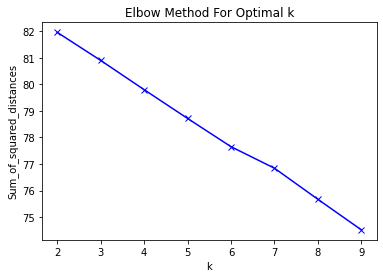

In [91]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [92]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
review_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])

In [93]:
review_cl.sort_values(by=['cluster']).head(2)

,title,cluster
77,https://www.imdb.com/review/rw5534894/?ref_=tt...,0
2,https://www.imdb.com/review/rw6650913/?ref_=tt...,0


In [94]:
reviews['cluster'] = review_cl['cluster']

In [95]:
reviews.head()

,URL,SOUP,CONTENT,NP_CHUNK,cluster
0,https://www.imdb.com/review/rw6540019/?ref_=tt...,"\n<!DOCTYPE html>\n\n<html xmlns:fb=""http://ww...",It might have been an error on Disney's part t...,"['It', 'an', 'error', 'Disney', 'part', 'episo...",1
1,https://www.imdb.com/review/rw6562703/?ref_=tt...,"\n<!DOCTYPE html>\n\n<html xmlns:fb=""http://ww...",Writing this with bated breath waiting on epis...,"['bated', 'breath', 'episode', 'The', 'whole',...",1
2,https://www.imdb.com/review/rw6650913/?ref_=tt...,"\n<!DOCTYPE html>\n\n<html xmlns:fb=""http://ww...",One might wonder that the above adjectives do ...,"['the', 'above', 'adjectives', 'the', 'Marvel'...",0
3,https://www.imdb.com/review/rw6603814/?ref_=tt...,"\n<!DOCTYPE html>\n\n<html xmlns:fb=""http://ww...",I can't speak for the reviews that bash this s...,"['I', 'the', 'reviews', 'this', 'show', 'three...",0
4,https://www.imdb.com/review/rw6479388/?ref_=tt...,"\n<!DOCTYPE html>\n\n<html xmlns:fb=""http://ww...",What a waste $25 Million Dollars A episode don...,"['a', 'waste', '25', 'Million', 'Dollars', 'A'...",0


In [96]:
reviews['cluster'] = review_cl['cluster']
reviews.to_csv(r'parsed_reviews_clustered4.csv', index = False)

Short Reviews, mostly negative

In [97]:
filter0 = review_cl['cluster']==0
review0 = review_cl.copy()
review0.where(filter0, inplace = True)
#review0.dropna()

I blame SOciety, Low Reviews, or Talking about negative parts of show and telling you to keep watching because it's great

In [98]:
filter1 = review_cl['cluster']==1
review1 = review_cl.copy()
review1.where(filter1, inplace = True)
#review1.dropna()

Positive words even in the negative reviews that mention 'brilliant' or 'Amazing---ly Awful'

In [99]:
filter2 = review_cl['cluster']==2
review2 = review_cl.copy()
review2.where(filter2, inplace = True)
#review2.dropna()

All from Coming to America

In [100]:
filter3 = review_cl['cluster']==3
review3 = review_cl.copy()
review3.where(filter3, inplace = True)
#review3.dropna()

# K-Means 6

In [101]:

true_k = 6
model6 = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model6.fit(X)
labels6=model6.labels_
review_cl6=pd.DataFrame(list(zip(title,labels6)),columns=['title','cluster'])

In [102]:
reviews['cluster'] = review_cl6['cluster']
reviews.to_csv(r'parsed_reviews_clustered6.csv', index = False)

Mostly negative MidSized reviews
Even positives point out negatives

In [109]:
reviews_cl6 = pd.read_csv("parsed_reviews_clustered6.csv")
filter0 = review_cl6['cluster']==0
review0 = review_cl6.copy()
review0.where(filter0, inplace = True)
review0.dropna()

,title,cluster
6,https://www.imdb.com/review/rw6479311/?ref_=tt...,0.0
27,https://www.imdb.com/review/rw1462409/?ref_=tt...,0.0
28,https://www.imdb.com/review/rw1568963/?ref_=tt...,0.0
47,https://www.imdb.com/review/rw6599337/?ref_=tt...,0.0
73,https://www.imdb.com/review/rw6624374/?ref_=tt...,0.0
74,https://www.imdb.com/review/rw5866146/?ref_=tt...,0.0


Mostly negative and Luke-warm reviews

In [110]:
filter1 = review_cl6['cluster']==1
review1 = review_cl6.copy()
review1.where(filter1, inplace = True)
review1.dropna()

,title,cluster
0,https://www.imdb.com/review/rw6540019/?ref_=tt...,1.0
11,https://www.imdb.com/review/rw4414989/?ref_=tt...,1.0
15,https://www.imdb.com/review/rw3711587/?ref_=tt...,1.0
17,https://www.imdb.com/review/rw4599357/?ref_=tt...,1.0
23,https://www.imdb.com/review/rw1573220/?ref_=tt...,1.0
24,https://www.imdb.com/review/rw6546669/?ref_=tt...,1.0
26,https://www.imdb.com/review/rw1050037/?ref_=tt...,1.0
29,https://www.imdb.com/review/rw1046363/?ref_=tt...,1.0
33,https://www.imdb.com/review/rw2141168/?ref_=tt...,1.0
38,https://www.imdb.com/review/rw2562681/?ref_=tt...,1.0


Short reviews, positive for the dark comedy and negative on the regular comedies

In [111]:
filter2 = review_cl6['cluster']==2
review2 = review_cl6.copy()
review2.where(filter2, inplace = True)
review2.dropna()

,title,cluster
10,https://www.imdb.com/review/rw6478664/?ref_=tt...,2.0
13,https://www.imdb.com/review/rw6300852/?ref_=tt...,2.0
14,https://www.imdb.com/review/rw3171646/?ref_=tt...,2.0
19,https://www.imdb.com/review/rw3783688/?ref_=tt...,2.0
34,https://www.imdb.com/review/rw4845953/?ref_=tt...,2.0
45,https://www.imdb.com/review/rw6606475/?ref_=tt...,2.0
49,https://www.imdb.com/review/rw6599420/?ref_=tt...,2.0
62,https://www.imdb.com/review/rw2891599/?ref_=tt...,2.0
77,https://www.imdb.com/review/rw5534894/?ref_=tt...,2.0


WandaVision, Schitt's Creek, Office, Modern Family, Crew, Brooklyn 99, Parks and Rec, Community
Mostly Positive, even the negative reviews are softer: 
'The premise is cute and the movie seemed like it was going places'

In [112]:
filter3 = review_cl6['cluster']==3
review3 = review_cl6.copy()
review3.where(filter3, inplace = True)
review3.dropna()

,title,cluster
1,https://www.imdb.com/review/rw6562703/?ref_=tt...,3.0
2,https://www.imdb.com/review/rw6650913/?ref_=tt...,3.0
3,https://www.imdb.com/review/rw6603814/?ref_=tt...,3.0
4,https://www.imdb.com/review/rw6479388/?ref_=tt...,3.0
5,https://www.imdb.com/review/rw6479456/?ref_=tt...,3.0
7,https://www.imdb.com/review/rw6479391/?ref_=tt...,3.0
8,https://www.imdb.com/review/rw6504712/?ref_=tt...,3.0
9,https://www.imdb.com/review/rw6641641/?ref_=tt...,3.0
12,https://www.imdb.com/review/rw3174778/?ref_=tt...,3.0
16,https://www.imdb.com/review/rw3413107/?ref_=tt...,3.0


Mostly Positive, Longer reviews
Friends, Schitts Creek, Modern Family, Coming to America

In [113]:
filter4 = review_cl6['cluster']==4
review4 = review_cl6.copy()
review4.where(filter4, inplace = True)
review4.dropna()

,title,cluster
18,https://www.imdb.com/review/rw6310104/?ref_=tt...,4.0
20,https://www.imdb.com/review/rw4270896/?ref_=tt...,4.0
36,https://www.imdb.com/review/rw2140109/?ref_=tt...,4.0
71,https://www.imdb.com/review/rw6597761/?ref_=tt...,4.0
89,https://www.imdb.com/review/rw2132626/?ref_=tt...,4.0
96,https://www.imdb.com/review/rw0255631/?ref_=tt...,4.0
97,https://www.imdb.com/review/rw1057459/?ref_=tt...,4.0
99,https://www.imdb.com/review/rw3242183/?ref_=tt...,4.0


Two short reviews for I Blame Society

In [114]:
filter5 = review_cl6['cluster']==5
review5 = review_cl6.copy()
review5.where(filter5, inplace = True)
review5.dropna()

,title,cluster
52,https://www.imdb.com/review/rw5578105/?ref_=tt...,5.0
80,https://www.imdb.com/review/rw2276639/?ref_=tt...,5.0
83,https://www.imdb.com/review/rw2056730/?ref_=tt...,5.0
84,https://www.imdb.com/review/rw2050373/?ref_=tt...,5.0
85,https://www.imdb.com/review/rw2054985/?ref_=tt...,5.0
87,https://www.imdb.com/review/rw2050158/?ref_=tt...,5.0
88,https://www.imdb.com/review/rw2793673/?ref_=tt...,5.0


Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings.


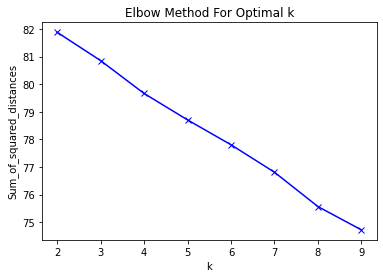

In [83]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()